In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import factorial
from scipy import integrate
import seaborn as sns

sns.set_context('talk')

plt.rcParams['xtick.major.size']  = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size']  = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size']  = 5
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size']  = 2
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.direction']   = 'in'
plt.rcParams['ytick.direction']   = 'in'
plt.rcParams['xtick.major.pad']   = 8
plt.rcParams['xtick.top']         = True
plt.rcParams['ytick.right']       = True
plt.rcParams["figure.figsize"]    = (7, 6)
plt.rcParams["mathtext.fontset"]  = 'stix'
plt.rcParams["font.family"]       = 'STIXGeneral'

In [76]:
rho = 0.9
mu = 1

def EW_MM1(rho, mu, n):
    return rho / (mu * (1 - rho))

def EW_MMn(rho, mu, n):
    pi_w = Pi_w(n, rho)
    return pi_w / (n * mu) / (1 - rho)

def Pi_w(n, rho):
    b = B(n - 1, n * rho)
    return rho * b / (1 - rho + rho * b)

def B(n, rho):
    B = 1
    for i in range(1, n + 1):
        B = rho * B / (i + rho * B)
    return B

def EW_MDn(rho, mu, n):
    return rho ** n / factorial(n) / (1 - rho) / 2 / mu


def EW_MM1_SPTF(rho, mu, n, upp):
    def integrand(x):
        return rho * np.exp(-x * mu) / (1 - (1 - np.exp(-x * mu) * (1 + x * mu)) * rho) ** 2
    I = integrate.quad(integrand, 0, upp)
    return I

In [77]:
EW_MM1_SPTF(0.5, mu, 1, 100)

(0.712686331938893, 1.5377111117172172e-11)

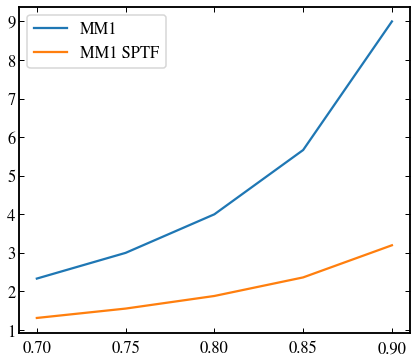

\begin{tabular}{rrr}
\toprule
 \$\textbackslash rho\$ &     FIFO &     SPTF \\
\midrule
   0.70 & 2.333333 & 1.312197 \\
   0.75 & 3.000000 & 1.555357 \\
   0.80 & 4.000000 & 1.882219 \\
   0.85 & 5.666667 & 2.363774 \\
   0.90 & 9.000000 & 3.196913 \\
\bottomrule
\end{tabular}



In [83]:
n = np.arange(0.7, 0.9, 0.05)

mm1 = [EW_MMn(i, mu, 1) for i in n]
mm1_sptf = [EW_MM1_SPTF(i, mu, 1, 100)[0] for i in n]

plt.plot(n, mm1, label='MM1')
plt.plot(n, mm1_sptf, label='MM1 SPTF')
plt.legend()
plt.show()

df = pd.DataFrame({
    '$\rho$': n,
    'FIFO': mm1,
    'SPTF': mm1_sptf
})
print(df.to_latex(index=False))

In [79]:
# n = np.linspace(0.7, 0.9, 100)
# # mmn = [EW_MMn(i, mu, 1) for i in n]
# # mdn = [EW_MM1(i, mu, 1) for i in n]

# for j in [1, 2, 3, 4]:
#     mmn = [EW_MMn(i, mu, j) for i in n]
#     plt.plot(n , mmn, label=f'$M/M/{j}$')
# plt.xlabel(r'$\rho$')
# plt.ylabel('$E[W]$')
# plt.xlim(0.7, 0.9)
# plt.ylim(0, )
# plt.title('Average waiting times $M/M/n$')
# plt.legend()

In [80]:
# n = np.linspace(0.7, 0.9, 100)
# mm1_sptf = [EW_MM1_SPTF(i, mu, 1) for i in n]
# mm1 = [EW_MM1(i, mu, 1) for i in n]

# plt.plot(n, mm1, label='MM1')
# plt.plot(n, mm1_sptf, label='MM1 SPTF')
# plt.legend()

In [81]:
df = pd.DataFrame({
    '$n$': n,
    '$M/M/n$': mmn,
    '$M/D/n$': mdn
})
print(df.to_latex(index=False))

\begin{tabular}{rrr}
\toprule
 \$n\$ &  \$M/M/n\$ &  \$M/D/n\$ \\
\midrule
0.70 & 9.000000 & 4.500000 \\
0.75 & 4.263158 & 2.025000 \\
0.80 & 2.723537 & 0.607500 \\
0.85 & 1.969383 & 0.136688 \\
0.90 & 1.524986 & 0.024604 \\
\bottomrule
\end{tabular}



In [82]:
x = np.linspace(1, 10, 10, dtype=int)
y = [EW_MMn(rho, mu, i) for i in x]

df = pd.DataFrame({
    'n': x,
    'E[W]': y
})
print(df.to_latex(index=False))
    

\begin{tabular}{rr}
\toprule
 n &     E[W] \\
\midrule
 1 & 9.000000 \\
 2 & 4.263158 \\
 3 & 2.723537 \\
 4 & 1.969383 \\
 5 & 1.524986 \\
 6 & 1.233543 \\
 7 & 1.028510 \\
 8 & 0.876916 \\
 9 & 0.760595 \\
10 & 0.668732 \\
\bottomrule
\end{tabular}



In a $M/M/1$ queue system with system load $\rho$ and capacity $\mu$ per server the arrival rate is given by $\lambda = \rho \mu$.  In the quilibrium limit of $t \rightarrow \infty$ the average number of people in the queue is given by 
$$
E[L^q] = \frac{\rho^2}{1 - \rho}.
$$
Using Little's law as 
$$
E[W] = \frac{1}{\lambda} E[L^q],
$$
we can infer the average waiting  time 
$$
E[W] = \frac{1}{\lambda} \frac{\rho^2}{1 - \rho} = \frac{\rho}{\mu (1 - \rho)}.
$$
(Adan 33)

In the case of a $M/M/n$ queue system with $n$ servers and the same system load $\rho$ and capacity $\mu$ the arrival rate is given by $\lambda = n \rho \mu$. The average number of people waiting in the queue is given by 
$$
E[L^q] = \Pi_W(n, \rho) \frac{\rho}{1 - \rho},
$$
with 
$$
\Pi_W(n, \rho) = \frac{(n \rho)^n}{n!} \left[ (1-\rho) \sum_{i=0}^{n-1} \frac{(n \rho)^i}{i!} + \frac{(n \rho)^n}{n!} \right]^{-1}.
$$
Using Little's law again now gives us
$$
E[W]  = \frac{1}{\lambda} \Pi_W(n, \rho) \frac{\rho}{1 - \rho} = \Pi_W(n, \rho) \frac{1}{n \mu} \frac{1}{1 - \rho}.
$$

The average waiting time with $\rho = 0.9$ and $\mu=1$ is equal for methods $M/M/1$ and $M/M/n=1$. This is to be expected since $\Pi_W(1, \rho) = \rho$. For higher values of $n$ the average waiting time drops drasticly for $M/M/n$ queues dispite having an identical server load. Both the $\Pi_W(n, \rho)$ and $\frac{1}{n}$ terms contribute to this decrease in waiting time. Intuitively we can imagine that  ???.

<!-- \begin{tabular}{rr}
\toprule
 n &     E[W] \\
\midrule
 1 & 9.000000 \\
 2 & 4.263158 \\
 3 & 2.723537 \\
 4 & 1.969383 \\
 5 & 1.524986 \\
 6 & 1.233543 \\
 7 & 1.028510 \\
 8 & 0.876916 \\
 9 & 0.760595 \\
10 & 0.668732 \\
\bottomrule
\end{tabular} -->

